# Data Challenge: Ultimate
---

## Part 1 - EDA

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles.


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
logins =  pd.read_json('logins.json')

In [20]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [18]:
def make_15min_intervals(data):
    hr = str(data.hour)
    mnt = ""
    
    if data.minute < 15:
        mnt = "00"
    elif data.minute < 30:
        mnt = "15"
    elif data.minute < 45:
        mnt = "30"
    elif data.minute <= 59:
        mnt = "45"
    hr_mnt = hr + ":" + mnt
    
    return hr_mnt

In [21]:
logins['time_15min'] = logins.login_time.apply(make_15min_intervals)

In [48]:
logins['time_hour'] = logins.login_time.apply(lambda x: x.hour)

In [49]:
logins.head()

,login_time,time_15min,time_hour
0,1970-01-01 20:13:18,20:00,20
1,1970-01-01 20:16:10,20:15,20
2,1970-01-01 20:16:37,20:15,20
3,1970-01-01 20:16:36,20:15,20
4,1970-01-01 20:26:21,20:15,20


In [40]:
time_order = []
for n in range(0,24):
    for m in ["00","15","30","45"]:
        time_order.append(str(n) +":"+ m)

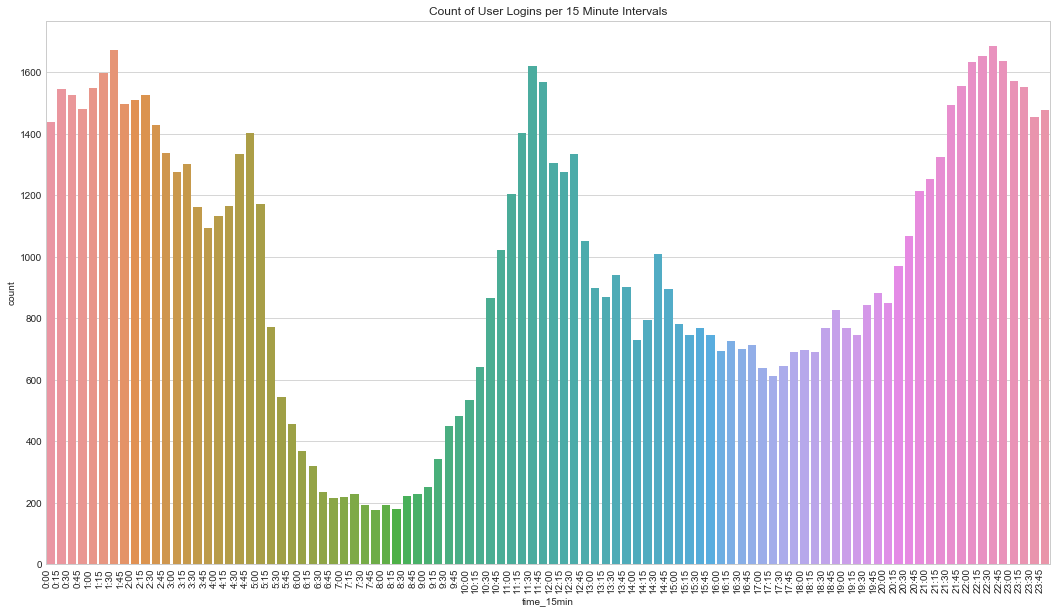

In [88]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.countplot(x="time_15min", data=logins, order=time_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title("Count of User Logins per 15 Minute Intervals")
plt.show()

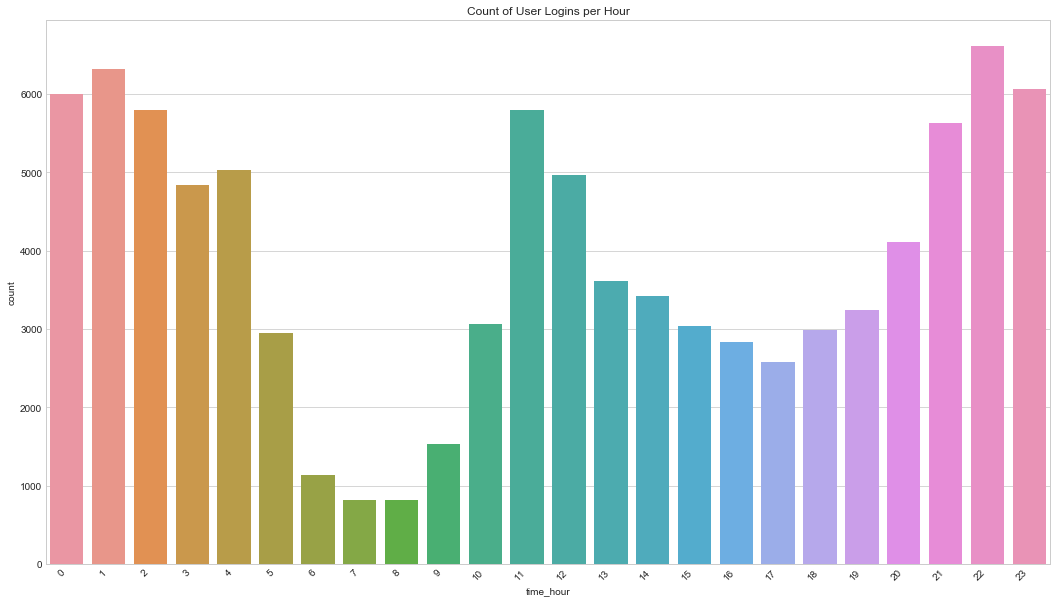

In [89]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.countplot(x="time_hour", data=logins)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title("Count of User Logins per Hour")
plt.show()

#### Analysis of aggregate of login counts on 15 minute intervals

There are high login counts peaking ~1600 from Midnight-5AM. Then there is a dip with lowest counts ~200 from 5-10AM. From 10AM-1PM, there is a gradual increase and decrease with a peak 1600 at 11:15-11:30AM. From 1-8PM, there's a plateau of login counts ~800 range. Finally, 8PM-Midnight, there are high counts averaging around 1500.

The lowest activity range is in the morning 5-10AM. The highest activity range is 8PM-5AM. Around noon, there is a peak of activity, but it maintains a plateau of logins until the high demand at night.

## Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

(1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
> Assuming there are no other variables involved within this experimental time frame, the total number of rides is sufficient as the key measure of success, since it should indicate the effect of the reimbursement on the total activity of both cities. Ultimately, what the company wants is higher overall activity for the company to increase its profit whether it's in either city on any day. So, by introducing this reimbursement and assuming there are no variables introduced, the ride counts will indicate the total benefits of the reimbursement.

(2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
* How you will implement the experiment
> Depending on the budget, the toll reimbursement is extended to a selected sample size or to all driver partners. The activity of driver rides will be tracked to see how much it increases or decreases, which will be compared to the data before this implementation of reimbursements. The length of this experiment again will depend on the estimated budget from the company.
* What statistical test(s) you will conduct to verify the significance of the observation
> I would hypothesis test the collected data with the proposed change against the data before the reimbursement using permutations or bootstrapping. A comparison of the mean values of rides will be sufficient with a significance level of 5%. The null hypothesis would state that the means are the same before and after, while the alternative hypothesis would state that the mean after is greater than before enacting this change. 
* How you would interpret the results and provide recommendations to the city operations team along with any caveats.
> * If the null hypothesis cannot be rejected, I would interpret that the toll reimbursement did not have any significant effect in increasing the activity of drivers. If the null is rejected, the alternative can be accepted and interpreted as increasing the activity of drivers. 
   * My recommendation, if the null cannot be rejected, is to stop the toll reimbursement. If the null is rejected, I would recommend continuing to extend this reimbursement. However, I would suggest continuing to look at the activity since this increase could fade away. A decrease could occur if the new factor of this toll reimbursement fades away or if for some reason drivers decide the toll does not do enough for the far drives and revert back to localizing to their cities of choice.

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

In [69]:
import json
import datetime

In [339]:
text=open('ultimate_data_challenge.json','r')
x = text.read()
y = json.loads(x)

riders = pd.DataFrame(y)
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


**Data description**
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

#### Missing Values?

In [355]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


>There are NaN values in some of the columns. Since the numbers don't seem to be too high, I will impute the mean values for the avg_rating columns and the majority value (iPhone) for the phone column. I do not want to lose the whole row just to compensate for these missing values and intuitively, it seems these values will play a mediocre to minor part in modeling.

In [341]:
# Impute for NaN values
values = {'avg_rating_by_driver': riders['avg_rating_by_driver'].mean(), 
          'avg_rating_of_driver': riders['avg_rating_of_driver'].mean(),
          'phone': 'iPhone'}
riders = riders.fillna(value=values)

#### EDA

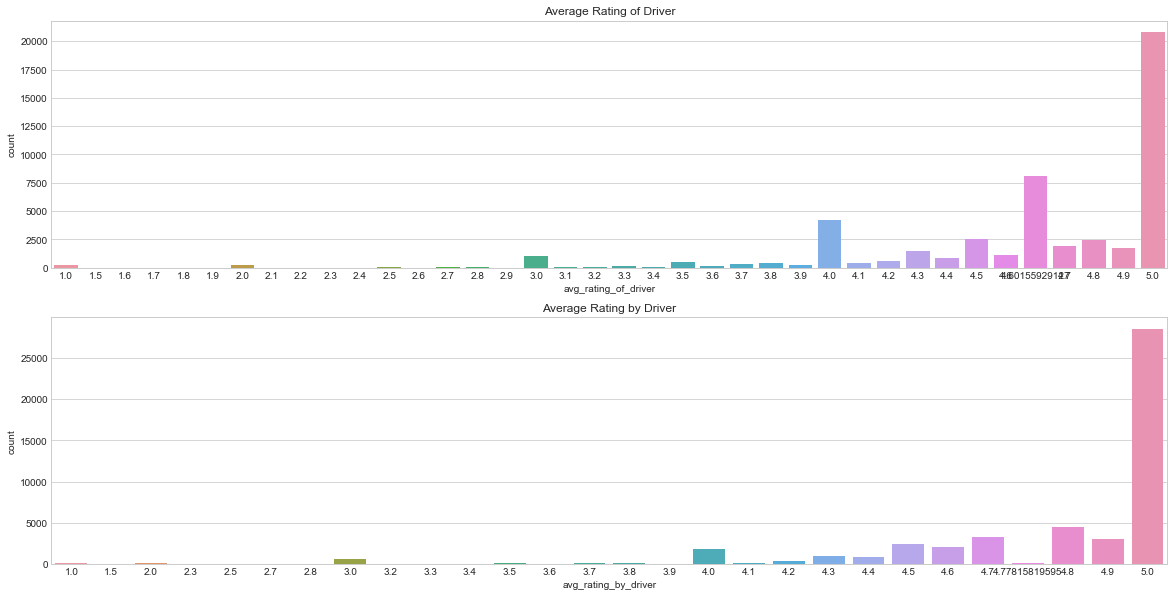

In [275]:
fig, ax = plt.subplots(2,1, figsize=(20, 10))

sns.countplot(x="avg_rating_of_driver", data=riders, ax=ax[0])
ax[0].set_title('Average Rating of Driver')

sns.countplot(x="avg_rating_by_driver", data=riders, ax=ax[1])
ax[1].set_title('Average Rating by Driver')

plt.show()

In [119]:
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(12,6))
    plt.scatter(x, y, marker='.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

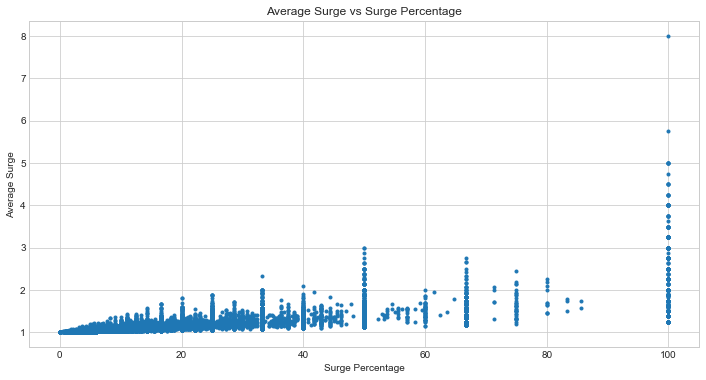

In [342]:
plot_scatter(riders.surge_pct, riders.avg_surge, 'Surge Percentage', 'Average Surge', 'Average Surge vs Surge Percentage')

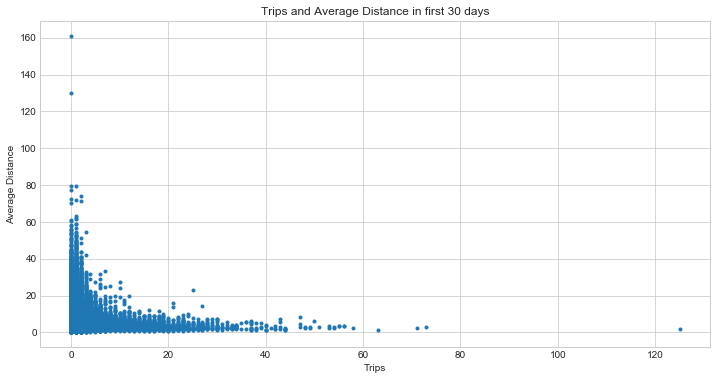

In [343]:
plot_scatter(riders.trips_in_first_30_days, riders.avg_dist, 'Trips', 'Average Distance', 
             'Trips and Average Distance in first 30 days')

#### What fraction of the observed users were retained?

In [357]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [360]:
# Convert datetime columns
riders.last_trip_date = pd.to_datetime(riders.last_trip_date)
riders.signup_date = pd.to_datetime(riders.signup_date)

# Assuming max of last trip date as date this data was collected since it is the latest date available
data_date = max(riders.last_trip_date)

# Whether rider is retained from activity 30 days preceding latest date, activity in June
riders["retention"] = (riders.last_trip_date >= (data_date + datetime.timedelta(-30))).astype(int)

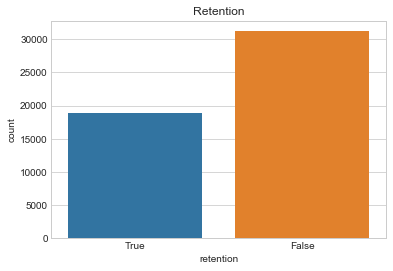

The retention for January riders is 37.61%.


In [146]:
ax = sns.countplot(x="retention", data=riders, order=[True, False])
ax.set_title('Retention')

plt.show()

print('The retention for January riders is {:.2f}%.'.format(riders['retention'].mean()*100))

#### Retention Stats

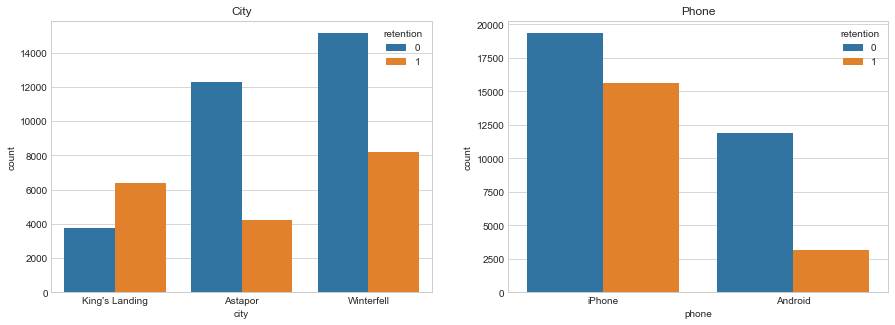

In [281]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x="city", hue='retention', data=riders, ax=ax[0])
ax[0].set_title('City')

sns.countplot(x="phone", hue='retention',data=riders, ax=ax[1])
ax[1].set_title('Phone')

plt.show()

> For phones, the proportions of driver retention for each phone is interesting to note, which may speak to the difference in the application platform and ease of use. For cities, although King's Landing has the least count, the retention is very high. Astapor seems to have the poorest penetration of retention and Winterfell holds the majority of counts with a ~33% retention.

In [319]:
# Compare means of retention riders
no_retention_mean = riders[riders['retention']==0].drop('retention', axis=1).mean()
retention_mean = riders[riders['retention']==1].drop('retention', axis=1).mean()

retention_df = pd.concat([no_retention_mean, retention_mean], axis=1)
retention_df.columns = ['no_retention_mean', 'retention_mean']
retention_df

,no_retention_mean,retention_mean
avg_dist,6.207939,5.114788
avg_rating_by_driver,4.787415,4.762801
avg_rating_of_driver,4.606309,4.593679
avg_surge,1.075339,1.073809
surge_pct,8.666739,9.152797
trips_in_first_30_days,1.658482,3.306318
ultimate_black_user,0.299942,0.505052
weekday_pct,60.647032,61.389034


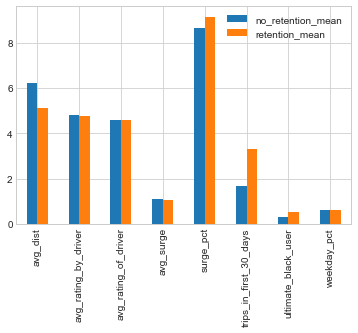

In [323]:
# Plot means of no retention and retention for features
retention_df.loc['weekday_pct'] = retention_df.loc['weekday_pct'].div(100)
retention_df.plot(kind='bar')
plt.show()

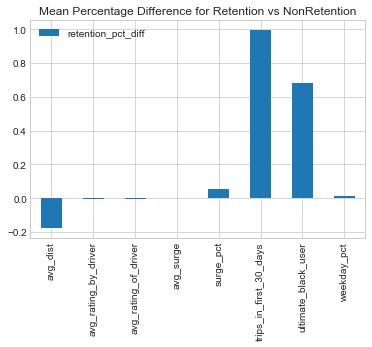

In [338]:
# Plot mean percentage difference between retention and nonretention
pct_diff_retention = retention_df.pct_change(axis='columns')
pct_diff_retention.drop('no_retention_mean', axis=1, inplace=True)
pct_diff_retention.columns = ['retention_pct_diff']
pct_diff_retention.plot(kind='bar')
plt.title('Mean Percentage Difference for Retention vs NonRetention')
plt.show()

#### Predictive Modeling

In [348]:
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [347]:
# Drop last trip date for ML modeling
riders_ml = riders.drop(['last_trip_date'], axis=1)

# Change phone column to 1 for iPhone and 0 for Android
riders_ml['phone'] = riders_ml['phone'].str.contains('iPhone').astype(int)

# Change ultimate black user column from boolean to int
riders_ml['ultimate_black_user'] = riders_ml['ultimate_black_user'].astype(int)

# Convert signup_date to amount of days since signup (to date of data collection being 07-01-2014)
riders_ml['signup_date'] = abs(riders['signup_date'] - data_date)
riders_ml['signup_date'] = riders_ml['signup_date'].astype(str).str[:3].astype(int)

# One hot encoder for cities
riders_ml = pd.get_dummies(riders_ml)

In [364]:
riders_ml.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,1,157,15.4,4,1,46.2,0,1,0
1,8.26,5.0,5.0,1.00,0,153,0.0,0,0,50.0,1,0,0
2,0.77,5.0,4.3,1.00,1,176,0.0,3,0,100.0,1,0,0
3,2.36,4.9,4.6,1.14,1,172,20.0,9,1,80.0,0,1,0
4,3.13,4.9,4.4,1.19,0,155,11.8,14,0,82.4,0,0,1


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import itertools

In [171]:
# Split features and target variable
X = riders_ml.drop('retention', axis=1)
y = riders_ml['retention']

In [212]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [206]:
def plot_auc_curve(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # plot curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [262]:
def model_report(model, X, y, title):
    """Takes in classifier model with X data and class weight to display scores and confusion matrix."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111)
    
    clf = model(random_state=1111)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    class_names = ['Not Retained', 'Retained']
    
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))    
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
      
    # Plot confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    
    # Plot auc curve
    plot_auc_curve(clf, X_test, y_test)
    
    return clf

Accuracy: 0.72
              precision    recall  f1-score   support

Not Retained       0.74      0.85      0.79      9465
    Retained       0.66      0.49      0.56      5535

 avg / total       0.71      0.72      0.71     15000



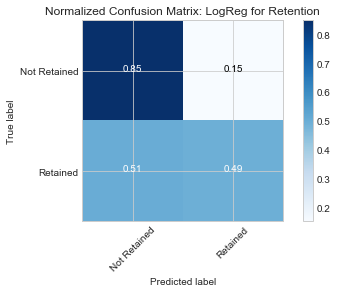

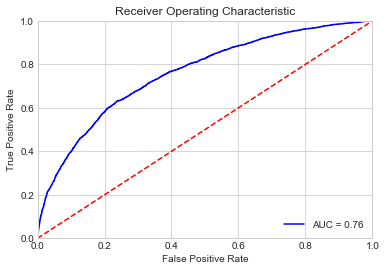

In [265]:
# Log Reg
logreg = model_report(LogisticRegression, X, y,'Normalized Confusion Matrix: LogReg for Retention')

Accuracy: 0.76
              precision    recall  f1-score   support

Not Retained       0.79      0.85      0.82      9465
    Retained       0.70      0.60      0.65      5535

 avg / total       0.76      0.76      0.75     15000



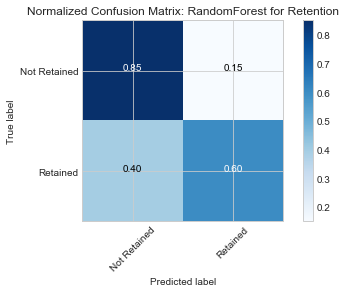

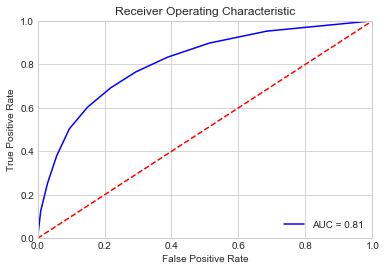

In [264]:
# Random Forest
rf = model_report(RandomForestClassifier, X, y,'Normalized Confusion Matrix: RandomForest for Retention')

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

> This is a supervised classification problem, so I used logistic regression and random forest classifier models. Another option for this kind of problem is SVM. These models are just out-of-the-box values for accuracy and they perform well at 72% (LogReg) and 76% (RandomForest) accuracy. Hyperparameter tuning would be necessary to improve the models and increase the accuracy of each model. Considering the random forest performs better out-the-box, it may be better to focus on this model proceeding forward with hyperparameter tuning. Key indicators of model performance are shown below in the features importances.

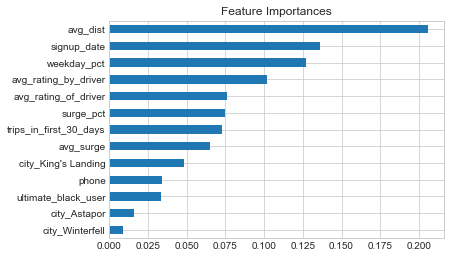

In [255]:
labels = list(X.columns)
features_importances = list(rf.feature_importances_)

features = dict(zip(labels, features_importances))
features_series = pd.Series(features).sort_values()

features_series.plot.barh()
plt.title('Features Importances')
plt.show()

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).
> By looking at the features of importance for longterm rider retention and the retention stats section above, Ultimate can incentivize those features for higher retention. For example, the feature importances show a higher importance for city of King's Landing and the retention ratio is much higher than the other cities, so marketing could focus on that city with the intention of targeting longterm riders. Or, on the otherhand, they can use this information to figure out what makes this city have more longterm retention and try to transfer similar effects to the other cities to increase the ratio in the other cities. The insights in this model with the data analysis in the other sections can allow Ultimate to improve rider retention in many other aspects similar to my example.